In [2]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
# !pip install h2o
# !pip install mlxtend

In [12]:
import matplotlib.pyplot as plt # plotting
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [14]:
import h2o
from h2o.estimators import H2OKMeansEstimator
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,59 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_uba_p_7cnd05
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.746 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [4]:
transactions = h2o.import_file("C:\\Users\\uba_p\\Downloads\\TFM\\creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
transactions.head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [6]:
transactions["Amount"].mean()
# AVG amount per transaction

[88.3496192509313]

In [7]:
transactions['Class'].table()

Class,Count
0,284315
1,492


In [8]:
transactions.summary()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508064,1.1751608993193201e-15,2.8421010880277033e-16,-1.4306306600409113e-15,2.030984597736651e-15,1.1240669471750018e-15,1.4753378681671898e-15,-5.237130094792622e-16,8.302767223451719e-17,-2.471669934981396e-15,2.171492966133526e-15,1.8138353011232985e-15,-1.1943211313734394e-15,8.334700943541917e-16,1.057006134985584e-15,4.802831501565917e-15,1.4545809501085606e-15,-3.736245250553273e-16,9.835585787781266e-16,1.0218790428863653e-15,6.514478898400579e-16,1.564752284419747e-16,-3.065637128659096e-16,2.4269627268551175e-16,4.464334068609808e-15,4.726190573349439e-16,1.6829070487534827e-15,-3.6354544465185827e-16,-1.1895310733599096e-16,88.3496192509313,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456615,1.958695803857486,1.6513085794769973,1.5162550051777715,1.4158685749409199,1.3802467340314397,1.3322710897575754,1.2370935981826663,1.1943529026692037,1.0986320892243193,1.0888497654025169,1.0207130277115588,0.9992013895301448,0.9952742301251535,0.9585956112570636,0.9153160116104393,0.8762528873883703,0.8493370636743892,0.8381762095288416,0.8140405007685786,0.7709250248871167,0.7345240143713131,0.7257015604409116,0.6244602955949901,0.60564706782716,0.5212780705409424,0.4822270132610574,0.4036324949650307,0.3300832641602509,250.12010924018853,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459

Text(0.5, 1.0, 'Heatmap of Correlation')

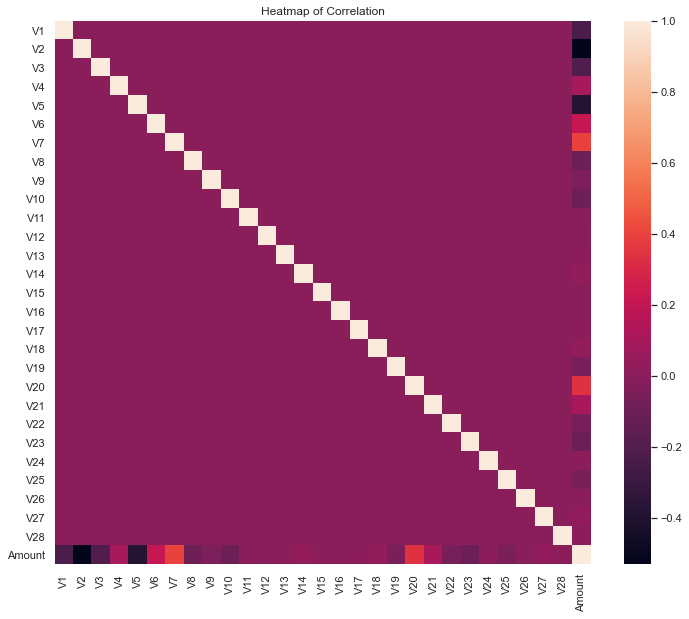

In [25]:
#heatmap
"""
corr = transactions.cor()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

transactions.summary()
"""
import pandas as pd

transactions_pd = pd.read_csv("C:\\Users\\uba_p\\Downloads\\TFM\\creditcard.csv")
corr = transactions_pd.iloc[:,1:30].corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


<AxesSubplot:>

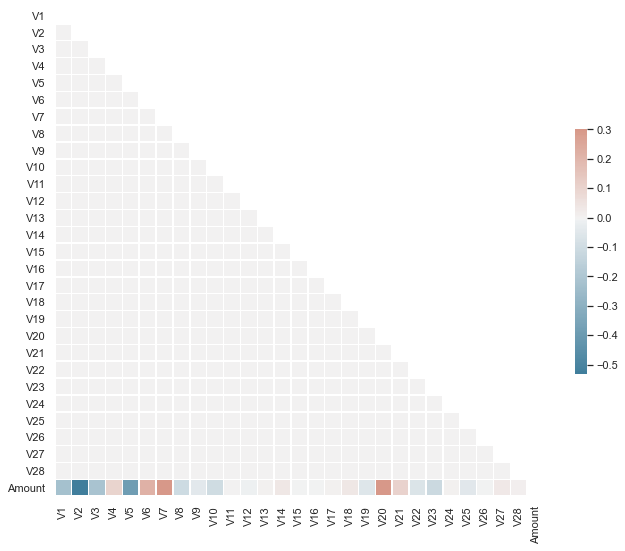

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = transactions_pd.iloc[:,1:30].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

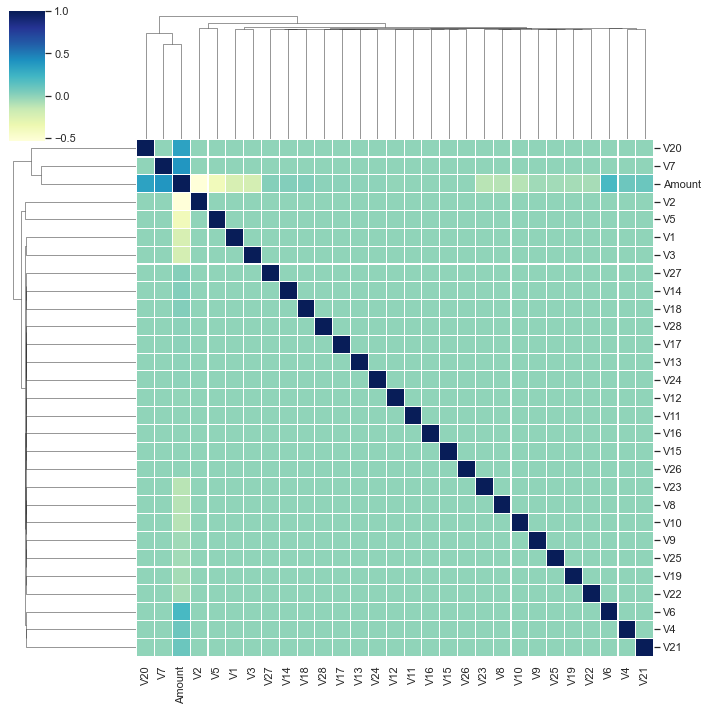

In [26]:
cg = sns.clustermap(corr, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
cg

In [31]:
import matplotlib.pyplot as plt # plotting
plotScatterMatrix(transactions_pd, 20, 10)

NameError: name 'plotScatterMatrix' is not defined

In [8]:
transactions.describe()

Rows:284807
Cols:31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508064,1.1751608993193201e-15,2.8421010880277033e-16,-1.4306306600409113e-15,2.030984597736651e-15,1.1240669471750018e-15,1.4753378681671898e-15,-5.237130094792622e-16,8.302767223451719e-17,-2.471669934981396e-15,2.171492966133526e-15,1.8138353011232985e-15,-1.1943211313734394e-15,8.334700943541917e-16,1.057006134985584e-15,4.802831501565917e-15,1.4545809501085606e-15,-3.736245250553273e-16,9.835585787781266e-16,1.0218790428863653e-15,6.514478898400579e-16,1.564752284419747e-16,-3.065637128659096e-16,2.4269627268551175e-16,4.464334068609808e-15,4.726190573349439e-16,1.6829070487534827e-15,-3.6354544465185827e-16,-1.1895310733599096e-16,88.3496192509313,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456615,1.958695803857486,1.6513085794769973,1.5162550051777715,1.4158685749409199,1.3802467340314397,1.3322710897575754,1.2370935981826663,1.1943529026692037,1.0986320892243193,1.0888497654025169,1.0207130277115588,0.9992013895301448,0.9952742301251535,0.9585956112570636,0.9153160116104393,0.8762528873883703,0.8493370636743892,0.8381762095288416,0.8140405007685786,0.7709250248871167,0.7345240143713131,0.7257015604409116,0.6244602955949901,0.60564706782716,0.5212780705409424,0.4822270132610574,0.4036324949650307,0.3300832641602509,250.12010924018853,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459

In [9]:
x = transactions_pd.iloc[:,1 : 29]

NameError: name 'transactions_pd' is not defined

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])


In [27]:
principalDf

,pc1,pc2
0,1.359740,0.071924
1,-1.191866,-0.265733
2,1.358247,1.339452
3,0.966312,0.185349
4,1.158199,-0.878457
...,...,...
284802,11.881083,-10.071609
284803,0.732714,0.054416
284804,-1.919616,0.300770
284805,0.240322,-0.531989


In [12]:
# Set the predictors:
predictors = transactions[1:29].names
predictors

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [13]:
#dropping old amount and time columns
# transactions = transactions.drop(['Amount', 'Time'], axis=1)
# transactions['Class'] = transactions['Class'].asfactor()
transactions.summary()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508064,1.1751608993193201e-15,2.8421010880277033e-16,-1.4306306600409113e-15,2.030984597736651e-15,1.1240669471750018e-15,1.4753378681671898e-15,-5.237130094792622e-16,8.302767223451719e-17,-2.471669934981396e-15,2.171492966133526e-15,1.8138353011232985e-15,-1.1943211313734394e-15,8.334700943541917e-16,1.057006134985584e-15,4.802831501565917e-15,1.4545809501085606e-15,-3.736245250553273e-16,9.835585787781266e-16,1.0218790428863653e-15,6.514478898400579e-16,1.564752284419747e-16,-3.065637128659096e-16,2.4269627268551175e-16,4.464334068609808e-15,4.726190573349439e-16,1.6829070487534827e-15,-3.6354544465185827e-16,-1.1895310733599096e-16,88.3496192509313,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456615,1.958695803857486,1.6513085794769973,1.5162550051777715,1.4158685749409199,1.3802467340314397,1.3322710897575754,1.2370935981826663,1.1943529026692037,1.0986320892243193,1.0888497654025169,1.0207130277115588,0.9992013895301448,0.9952742301251535,0.9585956112570636,0.9153160116104393,0.8762528873883703,0.8493370636743892,0.8381762095288416,0.8140405007685786,0.7709250248871167,0.7345240143713131,0.7257015604409116,0.6244602955949901,0.60564706782716,0.5212780705409424,0.4822270132610574,0.4036324949650307,0.3300832641602509,250.12010924018853,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459

In [28]:
# Split the dataset into a train and valid set:
train, valid = transactions.split_frame(ratios=[.7], seed=1234)
len(valid)

85222

In [15]:
# Build and train the model:
tr_kmeans = H2OKMeansEstimator(k=8,
                                 estimate_k=True,
                                 standardize=True,
                                 seed=1234)

In [16]:
tr_kmeans.train(x=predictors,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = tr_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = tr_kmeans.predict(valid)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [17]:
# Eval performance:
pred.table()

predict,Count
0,49941
1,118
2,815
3,5017
4,1502
5,5846
6,9450
7,12533


In [23]:
# Training random forest
trans_forest= H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)


In [24]:
response = "Class"

In [25]:
trans_forest.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)


H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1614102383503
    error_url = '/3/ModelBuilders/drf'
    msg = 'Illegal argument(s) for DRF model: DRF_model_python_1614101871980_4.  Details: ERRR on field: _calibrate_model: Model calibration is only currently supported for binomial models.'
    dev_msg = 'Illegal argument(s) for DRF model: DRF_model_python_1614101871980_4.  Details: ERRR on field: _calibrate_model: Model calibration is only currently supported for binomial models.'
    http_status = 412
    values = {'messages': [{'_log_level': 5, '_field_name': '_keep_cross_validation_models', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_predictions', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Only for Tweedie Distribution.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Tweedie power is only used for Tweedie distribution.'}, {'_log_level': 5, '_field_name': '_quantile_alpha', '_message': 'Quantile (alpha) is only used for Quantile regression.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Balance classes is false, hide max_after_balance_size'}, {'_log_level': 5, '_field_name': '_balance_classes', '_message': 'Balance classes is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Class sampling factors is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Max after balance size is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Max confusion matrix size is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Only for multi-class classification problems.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Only used with balanced classes'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Class sampling factors is only applicable if balancing classes.'}, {'_log_level': 1, '_field_name': '_calibrate_model', '_message': 'Model calibration is only currently supported for binomial models.'}], 'algo': 'DRF', 'parameters': {'_train': {'name': 'py_6_sid_8175', 'type': 'Key'}, '_valid': {'name': 'py_7_sid_8175', 'type': 'Key'}, '_nfolds': 0, '_keep_cross_validation_models': True, '_keep_cross_validation_predictions': False, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_preprocessors': None, '_seed': -1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'gaussian', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': ['Amount', 'Time'], '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_check_constant_response': True, '_is_cv_model': False, '_cv_fold': -1, '_score_each_iteration': False, '_max_runtime_secs': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'Class', '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_custom_distribution_func': None, '_export_checkpoints_dir': None, '_gainslift_bins': -1, '_auc_type': 'AUTO', '_ntrees': 10, '_max_depth': 5, '_min_rows': 10.0, '_nbins': 20, '_nbins_cats': 1024, '_min_split_improvement': 1e-05, '_histogram_type': 'AUTO', '_r2_stopping': 1.7976931348623157e+308, '_nbins_top_level': 1024, '_build_tree_one_node': False, '_score_tree_interval': 0, '_initial_score_interval': 4000, '_score_interval': 4000, '_sample_rate': 0.632, '_sample_rate_per_class': None, '_calibrate_model': True, '_calibration_frame': {'name': 'py_7_sid_8175', 'type': 'Key'}, '_col_sample_rate_change_per_level': 1.0, '_col_sample_rate_per_tree': 1.0, '_binomial_double_trees': True, '_mtries': -1}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for DRF model: DRF_model_python_1614101871980_4.  Details: ERRR on field: _calibrate_model: Model calibration is only currently supported for binomial models.'
    stacktrace =
        water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DRF model: DRF_model_python_1614101871980_4.  Details: ERRR on field: _calibrate_model: Model calibration is only currently supported for binomial models.
        water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)
        hex.ModelBuilder.trainModelOnH2ONode(ModelBuilder.java:324)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:51)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:16)
        water.api.RequestServer.serve(RequestServer.java:470)
        water.api.RequestServer.doGeneric(RequestServer.java:301)
        water.api.RequestServer.doPost(RequestServer.java:227)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:707)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:790)
        org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:865)
        org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:535)
        org.eclipse.jetty.server.handler.ScopedHandler.nextHandle(ScopedHandler.java:255)
        org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1317)
        org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:203)
        org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:473)
        org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:201)
        org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1219)
        org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:144)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)
        water.webserver.jetty9.Jetty9ServerAdapter$LoginHandler.handle(Jetty9ServerAdapter.java:130)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)
        org.eclipse.jetty.server.Server.handle(Server.java:531)
        org.eclipse.jetty.server.HttpChannel.handle(HttpChannel.java:352)
        org.eclipse.jetty.server.HttpConnection.onFillable(HttpConnection.java:260)
        org.eclipse.jetty.io.AbstractConnection$ReadCallback.succeeded(AbstractConnection.java:281)
        org.eclipse.jetty.io.FillInterest.fillable(FillInterest.java:102)
        org.eclipse.jetty.io.ChannelEndPoint$2.run(ChannelEndPoint.java:118)
        org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.runTask(EatWhatYouKill.java:333)
        org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.doProduce(EatWhatYouKill.java:310)
        org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.tryProduce(EatWhatYouKill.java:168)
        org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.run(EatWhatYouKill.java:126)
        org.eclipse.jetty.util.thread.ReservedThreadExecutor$ReservedThread.run(ReservedThreadExecutor.java:366)
        org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:762)
        org.eclipse.jetty.util.thread.QueuedThreadPool$2.run(QueuedThreadPool.java:680)
        java.lang.Thread.run(Unknown Source)
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'DRFParametersV3', 'schema_type': 'DRFParameters'}, 'model_id': None, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_6_sid_8175', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_6_sid_8175'}, 'validation_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_7_sid_8175', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_7_sid_8175'}, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'gaussian', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Class', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': ['Amount', 'Time'], 'ignore_const_cols': True, 'score_each_iteration': False, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'gainslift_bins': -1, 'custom_metric_func': None, 'custom_distribution_func': None, 'export_checkpoints_dir': None, 'auc_type': 'AUTO', 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 10, 'max_depth': 5, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'seed': -1, 'build_tree_one_node': False, 'sample_rate_per_class': None, 'col_sample_rate_per_tree': 1.0, 'col_sample_rate_change_per_level': 1.0, 'score_tree_interval': 0, 'min_split_improvement': 1e-05, 'histogram_type': 'AUTO', 'calibrate_model': True, 'calibration_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_7_sid_8175', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_7_sid_8175'}, 'check_constant_response': True, 'mtries': -1, 'binomial_double_trees': True, 'sample_rate': 0.632}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_models', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_predictions', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Only for Tweedie Distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Tweedie power is only used for Tweedie distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'quantile_alpha', 'message': 'Quantile (alpha) is only used for Quantile regression.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Balance classes is false, hide max_after_balance_size'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'balance_classes', 'message': 'Balance classes is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Class sampling factors is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Max after balance size is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Max confusion matrix size is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Only for multi-class classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Only used with balanced classes'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Class sampling factors is only applicable if balancing classes.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'calibrate_model', 'message': 'Model calibration is only currently supported for binomial models.'}]
    error_count = 2


In [ ]:
# Eval performance:
perf = trans_forest.model_performance()

# # Generate predictions on a validation set (if necessary):
pred = trans_forest.predict(valid)


In [ ]:
# predictions
pred["predict"].table()

In [ ]:
# validation data
valid["Class"].table()

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [16]:
num_array = train.as_data_frame().as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [15]:
num_array

NameError: name 'num_array' is not defined

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(train, valid)


ValueError: setting an array element with a sequence.